In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [102]:
def l_system(n,consts=('[',']'), axiom='0',rules= {'1':'11', '0':'1[0]0'}):
    """
    n: number of recursions
    consts: nonreplaceable elements a.k.a terminals
    axiom: initial condition
    rules: hash table for evolution of state
    
    defaults: fractal binary tree
    """
    s = axiom
#     def recursion(n):
#         if n == 1:
#             return 
#         else:
#             return 

    for i in range(n):
        new_s = ""
        for ix, e in enumerate(s):
            if e in consts:
                new_s += e
                continue
            else:
                e = rules[e]
                new_s += e
        s = new_s
    return s

'FFFF+[[FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X]-FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X]-FFFF[-FFFFFF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X]+FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X'

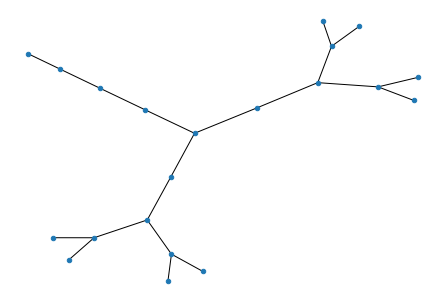

In [104]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

seq = l_system(n=3)


def seq2graph(seq, draw_rules):
    """
    Draw L-system graph, usually following some draw-push-pop procedure
        seq: L-system string
        draw_rules: symbols for drawing an edge, typically as part of a leaf or branch
    """
    edges = []
    i = 0
    history = [i] #starting at 0 imitates turtle graphic
    forks = [] # save push ('[') points
    for ix, r in enumerate(seq): #index, rule
        if r in draw_rules:
            i+=1
            history.append(i)
            edges.append(history[-2:])
        elif r == '[':
            forks.append(i)
            continue
        elif r == ']':
            pop_ix = history.index(forks[-1])
            forks.pop()
            history = history[:pop_ix+1] # go back to previous checkpoint
            continue

    return edges
    
# binary fractal tree
seq = l_system(n=3)
edges = seq2graph(seq, ('0', '1'))
G = nx.Graph(edges)
nx.draw(G, node_size=20)

In [116]:
seq = l_system(n=10,axiom='X',consts='+ - [ ]',rules={'X':'F+[[X]-X]-F[-FX]+X','F':'FF'})
# print(seq)
# edges = seq2graph(seq, ('F'))
# G = nx.Graph(edges)
# nx.draw(G, node_size=20)

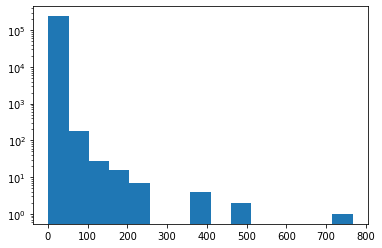

In [123]:
f_lens = []
count = 0
for ix, i in enumerate(seq):
    if i == 'F' and seq[ix-1] == 'F':
        count+=1
    if i != 'F' and seq[ix-1] != 'F':
        f_lens.append(count)
        count = 0
        
f_lens = [i for i in f_lens if i != 0]
plt.hist(f_lens, bins=15); plt.yscale('log'); plt.show()


In [122]:
set(f_lens)

{1, 2, 3, 5, 7, 11, 15, 23, 31, 47, 63, 95, 127, 191, 255, 383, 511, 767}